#  <center> Suicide Rates Overview 1985 to 2016 </center>
## Resumen de las tasas de suicidio de 1985 a 2016



<center><p style="color:blue;text-align:right;">Juan Carlos Bazán Panozo</p>
<p style="color:blue;text-align:right;">Inteligencia Artificial</p></center>

Este conjunto de datos compilado se extrajo de otros cuatro conjuntos de datos vinculados por tiempo y lugar, y se construyó para encontrar señales correlacionadas con el aumento de las tasas de suicidio entre diferentes cohortes a nivel mundial.



### link del enlace del database
<a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">DataSet  </a>

 <p style="color:red;text-align:center;"> <b>importacion de librerias a utilizar </b></p>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly 
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
from plotly.offline import iplot,init_notebook_mode
# You can go offline on demand by using
cf.go_offline() 
# To connect java script to your notebook
init_notebook_mode(connected=True)

<p style="color:red;text-align:center;"><b>importacion del dataset </b> </p>

In [2]:
datos=pd.read_csv("master.csv")

In [3]:
datos

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
datos.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<p style="color:red;text-align:center;"><b> descripcion de las columnas </b> </p>

In [5]:
datos.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<ul>
    <li>country - paiz de procedencia </li>
    <li>year - año del dato </li>
    <li>sex - sexo</li>
    <li>age - edad</li>
    <li>suicides_no - numero de suicidios </li>
    <li>population - poblacion </li>
    <li>suicides/100k pop - suicidios por un radio de 100 Km. de la poblacion </li>
    <li>country-year - paiz/año</li>
    <li>HDI for year - Indice de Desarrollo Humano por año / mide el avance conseguido por un paiz en 3 dimenciones basicas del desarrollo humano, salud, educacion y condicion de vida  </li>
    <li>gdp-for-year  - indice de producto interno bruto por año / es la suma de todos los bienes y servicios finales producidos por un paiz   </li>
    <li>gdp_per_capita -  es un indicador económico que mide la relación existente entre el nivel de renta de un país y su población  </li>
    <li>generation - generacion de edad en que nacio</li>
</ul>

<p style="color:red;text-align:center;"><b>Descripcion del dataset  </b> </p>

In [6]:
datos.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


<p style="color:red;text-align:center;"><b> Tipo de Datos que maneja el dataset </b> </p>

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<p style="color:red;text-align:center;"><b> mostrara la cantidad de filas y columnas </b> </p>

In [8]:
datos.shape

(27820, 12)

<p style="color:red;text-align:center;"> <b>Verificamos que columnas tienen valores vacios </b> </p>

In [9]:
datos.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

<p style="color:red;text-align:center;"> <b> Mostramos la cantidad de valores vacios </b> </p>

In [10]:
datos.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

<p style="color:red;text-align:center;"> <b>dado que una columna tiene demasiados datos vacios se considera elimiarlos </b> </p>

In [11]:
datos=datos.drop(['HDI for year'],axis = 1)
datos.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

<p style="color:red;text-align:center;"> <b>cambio de nombre de las columnas del dataset </b> </p>

In [12]:
datos=datos.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})
print("cambio de nombre de las columnas")
datos.columns

cambio de nombre de las columnas


Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

## Analis del dataset
### graficamos algunos datos para poder comprender en que consiste el dataset

<p style="color:red;text-align:center;"> <b>para analisis sacamos el año minimo y maximo del dataset </b> </p>

In [13]:
min_year=min(datos.Year)
max_year=max(datos.Year)
print('año minimo:',min_year)
print('año maximo',max_year)

año minimo: 1985
año maximo 2016


<p style="color:red;text-align:center;"> <b>numero de suicidios por año </b> </p>

In [14]:

anio_suicidio = datos.groupby('Year')[['SuicidesNo']].sum().reset_index()
anio_suicidio.sort_values(by='SuicidesNo', ascending=False).style.background_gradient(cmap='Blues', subset=['SuicidesNo'])

,Year,SuicidesNo
14,1999,256119
17,2002,256095
18,2003,256079
15,2000,255832
16,2001,250652
13,1998,249591
11,1996,246725
10,1995,243544
24,2009,243487
19,2004,240861


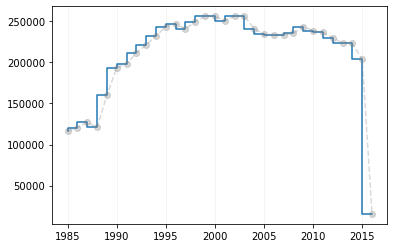

In [15]:
plt.step(anio_suicidio.Year,anio_suicidio.SuicidesNo)
plt.plot(anio_suicidio.Year,anio_suicidio.SuicidesNo,'o--',color='grey',alpha=0.3)
plt.grid(axis='x',color='0.95')
plt.show()

<p style="color:red;text-align:center;"> <b>suicidios por paiz</b> </p>

In [16]:
paices_suicidio=datos[['Country','SuicidesNo','Population','Suicides100kPop','GdpPerCapitalMoney']].groupby(
    'Country').sum()
paices_suicidio

,SuicidesNo,Population,Suicides100kPop,GdpPerCapitalMoney
Country,,,,
Albania,1970,62325467,924.76,490788
Antigua and Barbuda,11,1990228,179.14,3385212
Argentina,82219,1035985431,3894.59,2944044
Armenia,1905,77348173,976.21,558428
Aruba,101,1259677,1596.52,4069236
...,...,...,...,...
United Arab Emirates,622,36502275,94.89,3035664
United Kingdom,136805,1738767780,2790.92,11869908
United States,1034013,8054027201,5140.97,14608296


<p style="color:red;text-align:center;"> <b>Top 10 de paices con mayor suicidios </b> </p>

In [17]:
datos[['Country','SuicidesNo','Population','Suicides100kPop','GdpPerCapitalMoney']].groupby('Country').sum().\
sort_values('Suicides100kPop',ascending=False)[0:10].style.background_gradient(cmap='Blues')

,SuicidesNo,Population,Suicides100kPop,GdpPerCapitalMoney
Country,,,,
Russian Federation,1209742,3690802620,11305.130000,2112096
Lithuania,28039,68085210,10588.880000,2431504
Hungary,73891,248644256,10156.070000,2904716
Kazakhstan,101546,377513869,9519.520000,1662684
Republic of Korea,261730,1354944936,9350.450000,5506068
Austria,50073,243853094,9076.230000,13088000
Ukraine,319950,1286469184,8931.660000,627492
Japan,806902,3681024844,8025.230000,13539888
Finland,33677,141925658,7924.110000,12342960


<p style="color:red;text-align:center;"> <b>para realizar una grafica del mundo se importa un dataset diferente </b> </p>

In [18]:
continente=pd.read_csv('continents2.csv')
continente

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [19]:
def mismatch (series_1, series_2, only_out=True):
    out_num = 0
    for i in series_1.unique():
        if i in series_2.unique():
#         if any(series_2.unique() == i):  # alternative
            if not only_out:
                print("in :",i)
        else:
            print("out :",i)
            out_num += 1
    print(f"{out_num} mismatch(es) between those dataframes".upper())
    
mismatch(datos.Country, continente.name, True)



out : Bosnia and Herzegovina
out : Macau
out : Republic of Korea
out : Russian Federation
out : Saint Vincent and Grenadines
5 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [20]:
continente.loc[continente.name.str.contains("Bosnia"),'name']='Bosnia and Herzegovina'
continente.loc[continente.name.str.contains("Maca"),'name']='Macau'
continente.loc[continente.name.str.contains("Korea, Republic of"),'name']='Republic of Korea'
continente.loc[continente.name.str.contains("Russia"),'name']='Russian Federation'
continente.loc[continente.name.str.contains("Vincent"),'name']='Saint Vincent and Grenadines'
mismatch(datos.Country, continente.name, True)

0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [21]:
df = datos.merge(continente[['name','region','sub-region','alpha-3']], left_on='Country', right_on='name')
df

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,GdpForYearMoney,GdpPerCapitalMoney,Generation,name,region,sub-region,alpha-3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,Albania,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,Albania,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,Albania,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,Albania,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,Albania,Europe,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X,Uzbekistan,Asia,Central Asia,UZB
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent,Uzbekistan,Asia,Central Asia,UZB
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z,Uzbekistan,Asia,Central Asia,UZB
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z,Uzbekistan,Asia,Central Asia,UZB


In [22]:
df_map = pd.pivot_table(df,values= ['Suicides100kPop'], 
                     index=['region','name','alpha-3'],aggfunc='mean').reset_index()


fig = px.choropleth(data_frame = df_map,
                    locations= "alpha-3",
                    color= "Suicides100kPop",
                    hover_name= "name",
                    color_continuous_scale= 'thermal',
                   )

fig.show()

In [72]:
fig = px.choropleth(datos, locations='Country',
                   locationmode='country names',color=np.log(datos['SuicidesNo']),
                   animation_frame=datos['Year'],
                   title='Suicidios de los paices por el tiempo',color_continuous_scale='matter') #px.colors.sequential.matter

fig.show()

<p style="color:red;text-align:center;"> <b>Suicidios por Generos</b> </p>

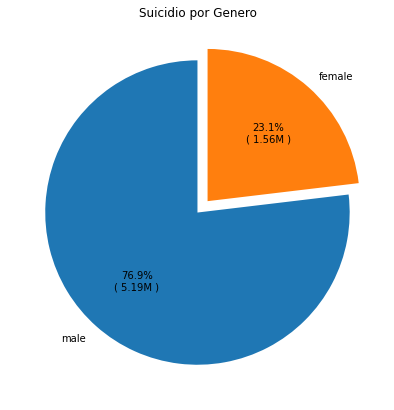

In [69]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n( {:.2f}M )".format(pct,round(absolute/1000000,2))

suicide_counts_by_sex = datos.groupby('Gender').SuicidesNo.sum()

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x = suicide_counts_by_sex.values[::-1], 
        labels=suicide_counts_by_sex.index[::-1], 
       explode=(0, 0.1),
       autopct=lambda pct: func(pct, suicide_counts_by_sex.values[::-1]),
       startangle=90)
ax.set_title("Suicidio por Genero");
plt.show()

In [25]:
generos_suicidios=datos[['Gender','SuicidesNo','Population','Suicides100kPop']].groupby('Gender').sum()
generos_suicidios

,SuicidesNo,Population,Suicides100kPop
Gender,,,
female,1559510,26272781857,75014.77
male,5188910,25049376579,281529.06


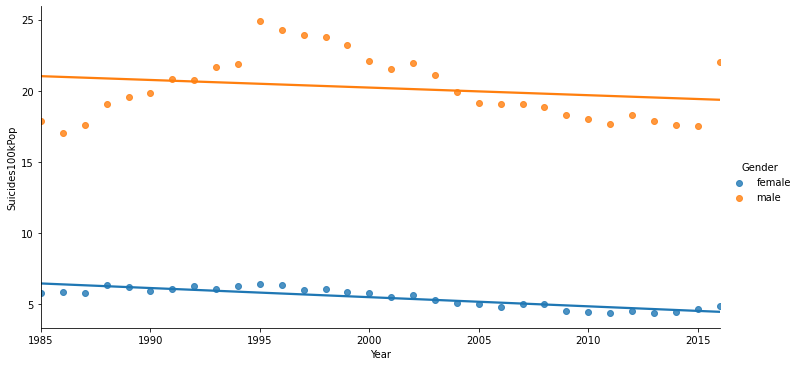

In [26]:
df1 = datos.groupby(['Year','Gender']).Suicides100kPop.mean()
df1 = pd.DataFrame(df1).reset_index()

sns.lmplot(x="Year", y="Suicides100kPop", hue="Gender",
               truncate=True, height=5, aspect=2, data=df1, ci=None);

<p style="color:red;text-align:center;"> <b>Suicidios por Edades</b> </p>

In [67]:
data = datos.groupby(['Year','Gender','Age']).sum().reset_index()
fig = px.bar(data_frame=data ,x='Gender', y='SuicidesNo', color='Age', barmode='group' ,opacity=1)
fig.update_layout(title='Grafica de barras de suicidios por edades y genero',
                   titlefont=(dict(size=20)),
                  yaxis=dict(title='Suicides Number',titlefont=dict(size=18)),
                  xaxis=dict(title='Gender',titlefont=dict(size=18)))
iplot(dict(data=fig))

## Prepocesamiento

<p style="color:red;text-align:center;"> <b>Separacion de datos de entrenamiento segun paiz</b> </p>

In [28]:
X=datos.loc[:,["Year","SuicidesNo","Population","Suicides100kPop","GdpPerCapitalMoney","Gender","Age","Generation"]]
Y=datos.loc[:,["Country"]]

<p style="color:red;text-align:center;"> <b>estandarizacion de los valore numericos y label en texto</b> </p>

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_attrs=["Year","SuicidesNo","Population","Suicides100kPop","GdpPerCapitalMoney"]
text_attrs=["Gender","Age","Generation"]

pre_proces=ColumnTransformer([
    ("numeric",StandardScaler(),num_attrs),
    ("text",OneHotEncoder(),text_attrs)])
datos_preproces=pre_proces.fit_transform(X)
datos_preproces

array([[-1.68361541, -0.24563927, -0.39161747, ...,  0.        ,
         0.        ,  0.        ],
       [-1.68361541, -0.25118231, -0.39287011, ...,  0.        ,
         0.        ,  1.        ],
       [-1.68361541, -0.25339953, -0.39754838, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.50451895, -0.20240354,  0.23451753, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.50451895, -0.22014127,  0.20114133, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.50451895, -0.24563927, -0.1037548 , ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Y_prepross=Y.apply(le.fit_transform)
Y_prepross

,Country
0,0
1,0
2,0
3,0
4,0
...,...
27815,100
27816,100
27817,100
27818,100


## Creacion de Modelo de Aprendizaje

<p style="color:red;text-align:center;"> <b>realizamos la particcion del dataset en conjunto de entrenamiento con un 80% de entrenamiento
    </b> </p>

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(datos_preproces,Y_prepross,test_size=0.2, random_state=42)

<p style="color:red;text-align:center;"> <b>realizamos entrenamiento por clasificacion, usando SVC para aprendizaje automatico
    </b> </p>

In [32]:
from sklearn.svm import SVC
#se crea un clasificador lineal 
clasificador=SVC(kernel="linear", C=0.025)
#se realiza en entrenamiento
clasificador.fit(X_train,y_train)
#obtenemos el accuracy del modelo en el conjutno de test
clasificador.score(X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.22232207045291158

el nivel de entrenamiento po SVC es muy bajo 

<p style="color:red;text-align:center;"> <b>Importamos la función de entrenamiento y validación cruzada
    </b> </p>

In [33]:

from sklearn.model_selection import cross_val_score
nScores = cross_val_score(clasificador, datos_preproces, Y_prepross, cv=10)
# Nos devuelve un array de tipo Numpy. Podemos usar el método mean para obtener la media de los valores devueltos
nScores.mean()

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when 

0.22739036664270312

el entrenamiento cruzado sigue igualmente bajo en la prediccion

<p style="color:red;text-align:center;"> <b>entrenamiento y prediccion por una red neuronal
    </b> </p>

In [34]:

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
mlp.fit(X_train,y_train.values.ravel())
prediccion=mlp.predict(X_test)

<p style="color:red;text-align:center;"><b> Evaluacion del modelo</b></p>


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,prediccion))


[[666 176   0  83   0   0]
 [182 691  32   1   0   0]
 [  0  65 883   0   2   0]
 [ 15   0   0 917   0   0]
 [  0   0   3   0 794 101]
 [  0   0   0   0  10 943]]


In [73]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       925
           1       0.74      0.76      0.75       906
           2       0.96      0.93      0.95       950
           3       0.92      0.98      0.95       932
           4       0.99      0.88      0.93       898
           5       0.90      0.99      0.94       953

    accuracy                           0.88      5564
   macro avg       0.88      0.88      0.88      5564
weighted avg       0.88      0.88      0.88      5564



<p style="color:red;text-align:center;"><b>Matriz de confusion </b></p>

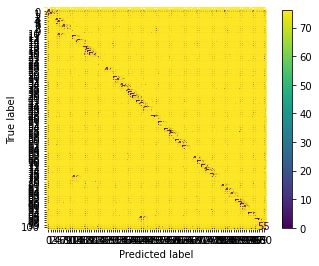

<Figure size 64800x50400 with 0 Axes>

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test, y_test)  
plt.figure(figsize=(900,700))
plt.show() 

<p style="color:red;text-align:center;"> <b>Nivel de aceptacion </b></p>

In [37]:
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test,prediccion)
exactitud

0.6189791516894321

<p style="color:red;text-align:center;"> <b>Nivel de presicion </b></p>

In [38]:
from sklearn.metrics import precision_score
precision=precision_score(y_test,prediccion,average=None,zero_division=1)
precision

array([0.65      , 0.72727273, 0.68965517, 0.48076923, 0.91666667,
       0.74603175, 0.37719298, 0.60869565, 0.62025316, 0.47058824,
       0.64285714, 0.30882353, 0.70588235, 0.37777778, 1.        ,
       0.98412698, 0.2987013 , 1.        , 0.89873418, 0.72413793,
       0.75641026, 0.56565657, 0.36764706, 0.52857143, 0.3       ,
       0.5       , 0.54385965, 1.        , 0.74193548, 0.5       ,
       0.5       , 0.66666667, 0.53921569, 0.74193548, 0.28125   ,
       0.66666667, 0.55263158, 0.41176471, 0.63636364, 0.83076923,
       0.65060241, 0.86764706, 0.44444444, 0.73239437, 0.48120301,
       0.64583333, 0.97101449, 0.52777778, 1.        , 0.56410256,
       0.72277228, 0.41176471, 0.67647059, 0.86666667, 1.        ,
       0.54545455, 0.5045045 , 0.6952381 , 0.88157895, 0.5       ,
       0.27777778, 0.69512195, 0.4516129 , 1.        , 0.86440678,
       0.        , 0.61538462, 0.32727273, 0.91666667, 0.72131148,
       0.64      , 0.71428571, 0.70833333, 0.8115942 , 0.75438

In [39]:
precision=precision_score(y_test,prediccion,average='micro')
precision

0.6189791516894321

<p style="color:red;text-align:center;"> <b>Nivel de sensibilidad y predicciones correctas </b></p>

In [40]:
#sensivilidad - predicciones positivas correctas
#y el numero de prediccion correctas
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test,prediccion,average=None,zero_division=1)
sensibilidad

array([0.53061224, 0.72727273, 0.6557377 , 0.5       , 0.56410256,
       0.66197183, 0.65151515, 0.60869565, 0.84482759, 0.25      ,
       0.49090909, 0.42      , 0.15584416, 0.76119403, 0.        ,
       0.81578947, 0.359375  , 0.        , 0.92207792, 0.77777778,
       0.86764706, 0.76712329, 0.54347826, 0.62711864, 0.57692308,
       0.53571429, 0.54385965, 0.25      , 0.54761905, 0.07142857,
       0.44      , 0.37037037, 0.70512821, 0.63888889, 0.18367347,
       0.76666667, 0.84      , 0.3442623 , 0.75      , 0.96428571,
       0.77142857, 0.80821918, 0.04597701, 0.60465116, 0.90140845,
       0.81578947, 0.90540541, 0.35185185, 0.75      , 0.37931034,
       0.97333333, 0.51851852, 0.37704918, 0.78787879, 0.        ,
       0.5       , 0.70886076, 0.93589744, 0.78823529, 0.33333333,
       0.32258065, 0.8028169 , 0.5915493 , 0.33333333, 0.71830986,
       0.        , 0.48      , 0.29032258, 0.89189189, 0.6984127 ,
       0.24615385, 0.88709677, 0.65384615, 0.76712329, 0.68253

In [41]:
sensibilidad=recall_score(y_test,prediccion,average='micro')
sensibilidad

0.6189791516894321

In [42]:
from sklearn.metrics import f1_score
puntaje=f1_score(y_test,prediccion,average=None)
puntaje

array([0.58426966, 0.72727273, 0.67226891, 0.49019608, 0.6984127 ,
       0.70149254, 0.47777778, 0.60869565, 0.71532847, 0.32653061,
       0.55670103, 0.3559322 , 0.25531915, 0.5049505 , 0.        ,
       0.89208633, 0.32624113, 0.        , 0.91025641, 0.75      ,
       0.80821918, 0.65116279, 0.43859649, 0.57364341, 0.39473684,
       0.51724138, 0.54385965, 0.4       , 0.63013699, 0.125     ,
       0.46808511, 0.47619048, 0.61111111, 0.68656716, 0.22222222,
       0.71317829, 0.66666667, 0.375     , 0.68852459, 0.89256198,
       0.70588235, 0.83687943, 0.08333333, 0.66242038, 0.62745098,
       0.72093023, 0.93706294, 0.42222222, 0.85714286, 0.45360825,
       0.82954545, 0.45901639, 0.48421053, 0.82539683, 0.        ,
       0.52173913, 0.58947368, 0.79781421, 0.83229814, 0.4       ,
       0.29850746, 0.74509804, 0.51219512, 0.5       , 0.78461538,
       0.        , 0.53932584, 0.30769231, 0.90410959, 0.70967742,
       0.35555556, 0.79136691, 0.68      , 0.78873239, 0.71666

In [43]:
puntaje=f1_score(y_test,prediccion,average='micro')
puntaje

0.6189791516894321

<p style="color:red;text-align:center;"> <b>Separacion de datos de entrenamiento segun Edad</b> </p>

In [44]:
X=datos.loc[:,["Country","Year","SuicidesNo","Population","Suicides100kPop","GdpPerCapitalMoney","Gender","Age","Generation"]]
Y=datos.loc[:,["Age"]]

In [45]:
num_attrs=["Year","SuicidesNo","Population","Suicides100kPop","GdpPerCapitalMoney"]
text_attrs=["Country","Generation"]

pre_proces=ColumnTransformer([
    ("numeric",StandardScaler(),num_attrs),
    ("text",OneHotEncoder(),text_attrs)])
datos_preproces=pre_proces.fit_transform(X)
datos_preproces

<27820x112 sparse matrix of type '<class 'numpy.float64'>'
	with 194740 stored elements in Compressed Sparse Row format>

In [46]:
le=preprocessing.LabelEncoder()
Y_prepross=Y.apply(le.fit_transform)
Y_prepross

,Age
0,0
1,2
2,0
3,5
4,1
...,...
27815,2
27816,5
27817,3
27818,3


In [47]:
X_train, X_test, y_train,y_test=train_test_split(datos_preproces,Y_prepross,test_size=0.2, random_state=42)

In [48]:

mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
mlp.fit(X_train,y_train.values.ravel())
prediccion=mlp.predict(X_test)

<p style="color:red;text-align:center;"> <b>nivel de presicion del entrenamiento</b> </p>

In [49]:
mlp.score(X_train,y_train.values.ravel())


0.894814881380302

In [76]:
print(confusion_matrix(y_test,prediccion))

[[666 176   0  83   0   0]
 [182 691  32   1   0   0]
 [  0  65 883   0   2   0]
 [ 15   0   0 917   0   0]
 [  0   0   3   0 794 101]
 [  0   0   0   0  10 943]]


In [77]:

print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       925
           1       0.74      0.76      0.75       906
           2       0.96      0.93      0.95       950
           3       0.92      0.98      0.95       932
           4       0.99      0.88      0.93       898
           5       0.90      0.99      0.94       953

    accuracy                           0.88      5564
   macro avg       0.88      0.88      0.88      5564
weighted avg       0.88      0.88      0.88      5564



<p style="color:red;text-align:center;"> <b>graficas de la matriz de confusion</b> </p>

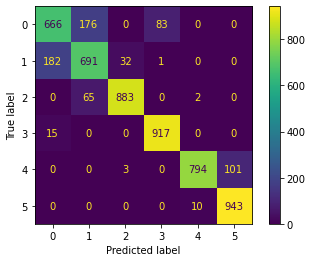

In [51]:
plot_confusion_matrix(mlp, X_test, y_test)  

plt.show() 

<p style="color:red;text-align:center;"> <b>entrenameinto con vecinos mas cercanos</b> </p>

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
rango_parametro=np.arange(1,10,1)


In [61]:
train_score,test_score=validation_curve(KNeighborsClassifier(),X_train,y_train.values.ravel(),
                                       param_name="n_neighbors",
                                       param_range= rango_parametro,
                                       cv=5,scoring="accuracy")

In [62]:
#Cálculo de la desviación estándar y media de la puntuación de entrenamiento
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

In [63]:
#Calcular la media y la desviación estándar de la puntuación de la prueba
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)


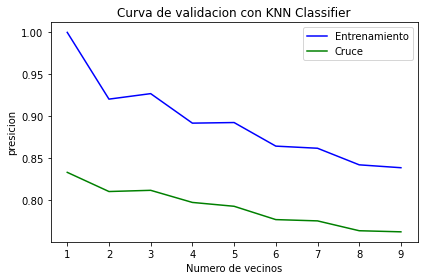

In [80]:
#Grafique las puntuaciones medias de precisión para las puntuaciones de entrenamiento y pruebas
plt.plot(rango_parametro, mean_train_score,
     label = "Entrenamiento", color = 'b')
plt.plot(rango_parametro, mean_test_score,
   label = "Cruce", color = 'g')

plt.title("Curva de validacion con KNN Classifier")
plt.xlabel("Numero de vecinos")
plt.ylabel("presicion")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()